# PREDICTING IRIS FLOWER SPECIES WITH K-MEANS CLUSTERING IN PYTHON

Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [7]:
#load the dataset
data = datasets.load_iris()
data.feature_names
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


How do you find the optimum number of clusters for K Means? We ahve to determine the value of K

The two methods that can be useful to find this mysterious k in k-Means are:

1.The Elbow Method
2.The Silhouette Method

# The Elbow Method

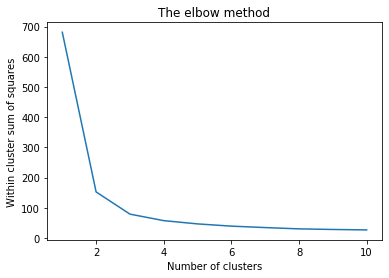

In [35]:
x = df.iloc[:, ].values
from sklearn.cluster import KMeans
res = []
for i in range(1, 11):
    k = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0,verbose=0)
    
    k.fit(x)
    res.append(k.inertia_)
    
# Plotting the results onto a line graph,to observe 'The elbow'
plt.plot(range(1,11),res)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()
    

From the above graph, it cam be concluded that the number of clusters should be 3

In [36]:
# Creating the kmeans classifier
k = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_means = k.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

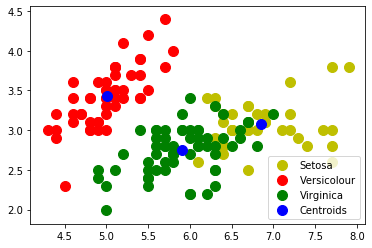

In [45]:
# Visualising the clusters - on first two columns
plt.scatter(x[y_means==0,0], x[y_means==0, 1],s=100,c='y',label='Setosa')
plt.scatter(x[y_means==1, 0], x[y_means == 1, 1], s = 100, c = 'r', label = 'Versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'g', label = 'Virginica')

#plotting the centroids of the clusters
# Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:, 0],k.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()
plt.show()
